In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HW2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/HW2


## RQ 1: Exploratory Data Analysis

We import the necessary libraries and set the dataset paths.

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
authors_set = 'lighter_authors.json'
books_set = 'lighter_books.json'

Loading the Authors Dataset

In [ ]:
# Chunk size
chunk_size = 50000
# Initialize an empty list to store chunks
authors = pd.DataFrame()
# Loop through each chunk and append it to the result dataframe
for chunk in pd.read_json(authors_set, lines=True, chunksize=chunk_size):
    # Select only the required columns from the chunk
    #selected_chunk = chunk[["name", "gender", "fans_count", "average_rating", "ratings_count", "text_reviews_count", "works_count"]]
    # Append the selected chunk to the list
    authors = pd.concat([authors, chunk], ignore_index=True)

In [ ]:
authors.head(5)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [ ]:
authors.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


Data Cleaning on Authors

In [ ]:
authors2 = authors

In [ ]:
authors2.shape

(351767, 12)

In [ ]:
authors[authors.apply(lambda x: len(x.work_ids)!=x.works_count, axis=1)].shape[0]

444

These 444 rows are junk rows because count of work does not match with the number of work ids listed. Hence we will discard these rows.

In [ ]:
authors2=authors2[authors2.apply(lambda x: len(x.work_ids)==x.works_count, axis=1)]

In [ ]:
authors2.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.513230e+05,351323.000000,351323.000000,351323.000000,3.513230e+05,351323.000000
mean,4.484867e+03,3.650981,320.351201,16.279185,7.758528e+06,107.322885
std,9.136027e+04,1.211959,3641.125698,40.387565,6.578301e+06,2319.479591
min,-4.100000e+01,-31.000000,0.000000,0.000000,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000,1.547222e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000,6.471876e+06,4.000000
75%,3.080000e+02,4.250000,52.000000,15.000000,1.434526e+07,20.000000
max,2.700375e+07,5.000000,606373.000000,1511.000000,2.124802e+07,455358.000000


Looking at the negative minimum values of the numeric columns in this description, we decide to filter those out.

In [ ]:
authors2.dropna(inplace=True)

<ipython-input-8-26e85020d60f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors2.dropna(inplace=True)


In [ ]:
authors2 = authors2[(authors2[["fans_count", "average_rating", "ratings_count", "text_reviews_count", "works_count"]] >= 0).all(axis=1)]

In [ ]:
authors2.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.512960e+05,351296.000000,351296.000000,351296.000000,3.512960e+05,351296.000000
mean,4.485211e+03,3.651070,320.375586,16.280052,7.758450e+06,107.331498
std,9.136377e+04,1.210561,3641.264559,40.388956,6.578473e+06,2319.568516
min,0.000000e+00,0.000000,0.000000,0.000000,4.000000e+00,0.000000
25%,6.000000e+00,3.600000,1.000000,2.000000,1.546958e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000,6.471733e+06,4.000000
75%,3.080000e+02,4.250000,52.000000,15.000000,1.434546e+07,20.000000
max,2.700375e+07,5.000000,606373.000000,1511.000000,2.124802e+07,455358.000000


Now the description gives proper values for the minimum of the numeric columns.

In [ ]:
min(authors2['work_ids'])

[]

The minimum of the work_ids column has returned empty list, we will clear this junk as well and we repeat this same technique for all other non numeric columns.

In [ ]:
authors2=authors2[authors2.apply(lambda x: x.work_ids!=[] and x.book_ids!=[],axis=1)]

In [ ]:
authors2[authors2['gender']==''].shape[0]

103237

As per this query, I got 103237 rows with no Gender of the author specified. To do a better analysis of the data, I am discarding these rows with no gender specified and saving it to another copy as authors3.

In [ ]:
authors3=authors2[authors2['gender']!='']

In [ ]:
authors3.shape[0]

248056

Loading the Books Dataset

In [ ]:
# Chunk size
chunk_size = 50000
# Initialize an empty list to store chunks
books = pd.DataFrame()
# Loop through each chunk and append it to the result dataframe
for chunk in pd.read_json(books_set, lines=True, chunksize=chunk_size):
    # Select only the required columns from the chunk
    selected_chunk = chunk[["title", "num_pages", "language", "average_rating", "ratings_count","text_reviews_count", "author_name", "original_publication_date", "publication_date","format","series_id","series_name","series_position"]]
    #selected_chunk = chunk[["original_publication_date"]]
    # Append the selected chunk to the list
    books = pd.concat([books, selected_chunk], ignore_index=True)

In [ ]:
books.head(5)

,title,num_pages,language,average_rating,ratings_count,text_reviews_count,author_name,original_publication_date,publication_date,format,series_id,series_name,series_position
0,Harry Potter and the Order of the Phoenix (Har...,870,eng,4.50,2628006,44716,J.K. Rowling,2003-06-21,2004-09,Paperback,45175,Harry Potter,5
1,Harry Potter and the Sorcerer's Stone (Harry P...,309,eng,4.48,7377351,116930,J.K. Rowling,1997-06-26,2003-11-01,Hardcover,45175,Harry Potter,1
2,Harry Potter and the Chamber of Secrets (Harry...,352,eng,4.43,2855044,55286,J.K. Rowling,1998-07-02,2003-11-01,Hardcover,45175,Harry Potter,2
3,Harry Potter and the Prisoner of Azkaban (Harr...,435,eng,4.57,2946694,58023,J.K. Rowling,1999-07-08,2004-05-01,Mass Market Paperback,45175,Harry Potter,3
4,Harry Potter and the Goblet of Fire (Harry Pot...,734,eng,4.56,2705676,48637,J.K. Rowling,2000-07-08,2002-09-28,Paperback,45175,Harry Potter,4


In [ ]:
books.describe()

,average_rating,ratings_count,text_reviews_count
count,7.027431e+06,7.027431e+06,7.027431e+06
mean,3.306188e+00,1.945861e+04,6.417258e+02
std,1.435734e+00,1.609008e+05,4.169806e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.360000e+00,3.000000e+00,0.000000e+00
50%,3.810000e+00,4.500000e+01,5.000000e+00
75%,4.080000e+00,7.710000e+02,6.400000e+01
max,5.000000e+00,7.400639e+06,1.745240e+05


Data Cleaning on books:

In [ ]:
books2 = books

In [ ]:
books2.dropna(subset=["title", "num_pages", "language", "average_rating", "ratings_count", "author_name", "original_publication_date", "publication_date","text_reviews_count","format","series_id","series_name","series_position"], inplace=True)

In [ ]:
books2.shape[0]

7027431

In [ ]:
min(books2['title'])

''

I can see blank Title in the books dataset, I will discard such rows and apply the same technique to other columns.

In [ ]:
books2= books2[books2.apply(lambda x: x.title!='' and x.author_name!='', axis=1)]

In [ ]:
books2.shape[0]

7027398

In [ ]:
# Filter out rows with incorrect values in "num_pages" (e.g., non-numeric values)
books2['num_pages'] = pd.to_numeric(books2['num_pages'], errors='coerce')
books2 = books2[books2['num_pages'].notna()]
books2 = books2[books2['num_pages'] != 0]
min_num_pages = books2["num_pages"].min()

<ipython-input-19-337f7037a939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books2['num_pages'] = pd.to_numeric(books2['num_pages'], errors='coerce')


In [ ]:
books2 = books2[(books2[["average_rating", "ratings_count", "num_pages","text_reviews_count"]] >= 0).all(axis=1)]

In [ ]:
from datetime import datetime

books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"], errors='coerce')
books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"])
present_date = datetime.now()
books2 = books2[books2['original_publication_date'] <= present_date]
books2["original_publication_date"].max()

Timestamp('2023-10-14 00:00:00')

In [ ]:
books2 = books2[books2["author_name"] != "NOT A BOOK"]

In [ ]:
books2 = books2[books2["language"] != ""]

In [ ]:
books2 = books2.drop_duplicates(subset = ["title"])

In [ ]:
books2.shape[0]

1271100

Exploratory Data Analysis on Authors set:

Base statistics on average_rating
mean 3.71
median 3.95
min and max 0.0 5.0


<function matplotlib.pyplot.show(close=None, block=None)>

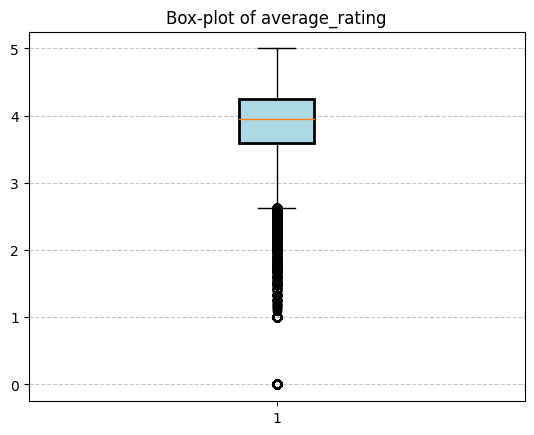

In [ ]:
media = authors3['average_rating'].mean()
mediana = authors3['average_rating'].median()
minimo = authors3['average_rating'].min()
massimo = authors3['average_rating'].max()

print("Base statistics on average_rating")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["average_rating"], showfliers=True, patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of average_rating")
plt.show

Base statistics on fans_count
mean 127.33
median 5.0
min and max 0 455358


<function matplotlib.pyplot.show(close=None, block=None)>

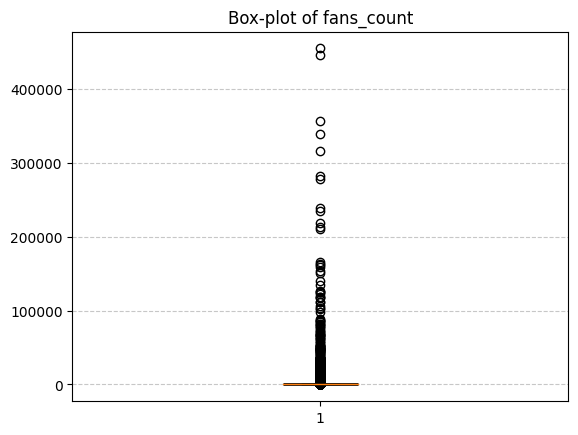

In [ ]:
media = authors3['fans_count'].mean()
mediana = authors3['fans_count'].median()
minimo = authors3['fans_count'].min()
massimo = authors3['fans_count'].max()

print("Base statistics on fans_count")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["fans_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of fans_count")
plt.show

Base statistics on ratings_count
mean 5474.95
median 51.0
min and max 0 27003752


<function matplotlib.pyplot.show(close=None, block=None)>

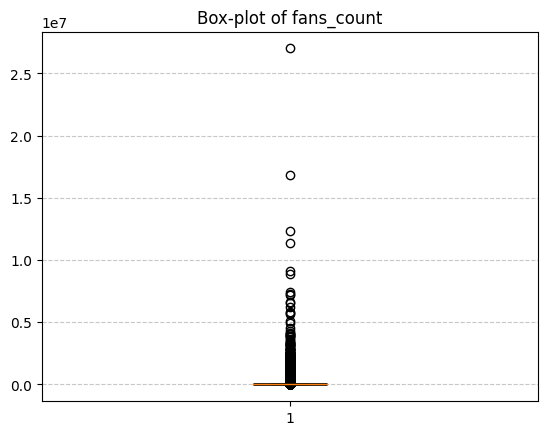

In [ ]:
media = authors3['ratings_count'].mean()
mediana = authors3['ratings_count'].median()
minimo = authors3['ratings_count'].min()
massimo = authors3['ratings_count'].max()

print("Base statistics on ratings_count")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["ratings_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of fans_count")
plt.show

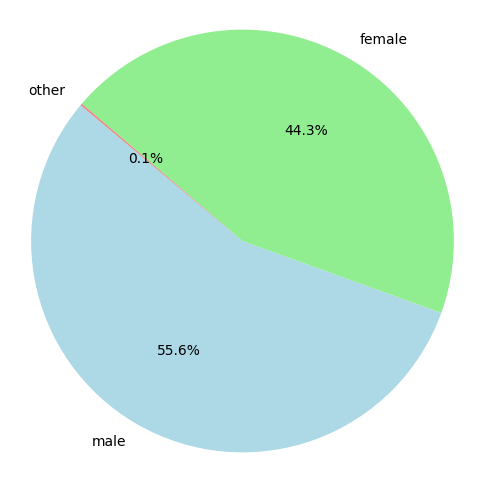

In [ ]:
conteggio_output = authors3['gender'].value_counts().reset_index()
conteggio_output.columns = ['gender', 'count']
conteggio_output_ordinato = conteggio_output.sort_values(by='count', ascending=False)
conteggio_output_ordinato = conteggio_output_ordinato[conteggio_output_ordinato["gender"] != ""]
maschifemmine = conteggio_output_ordinato[conteggio_output_ordinato["gender"].isin(["male", "female"])]
riga_altro = pd.DataFrame({"gender": ["other"], "count": [conteggio_output_ordinato["count"].sum() - maschifemmine["count"].sum()]})
maschifemmine = pd.concat([maschifemmine, riga_altro], ignore_index=True)
plt.figure(figsize=(6, 6))
plt.pie(maschifemmine['count'], labels=maschifemmine['gender'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=140)
plt.title('')
plt.axis('equal')
plt.show()

Exploratory Data Analysis on Books Set

Base statistics on num_pages
mean 3649.7
median 239.0
min and max 1.0 2147483647.0


<function matplotlib.pyplot.show(close=None, block=None)>

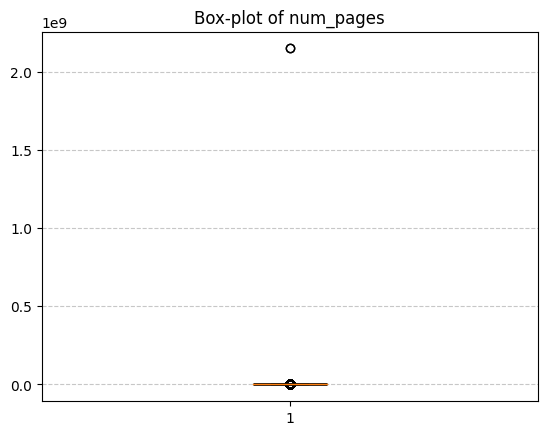

In [ ]:
media = books2['num_pages'].mean()
mediana = books2['num_pages'].median()
minimo = books2['num_pages'].min()
massimo = books2['num_pages'].max()

print("Base statistics on num_pages")
print("mean", round(media, 1))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(books2["num_pages"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of num_pages")
plt.show

Base statistics on average_rating
mean 3.7
median 3.88
min and max 0.0 5.0


<function matplotlib.pyplot.show(close=None, block=None)>

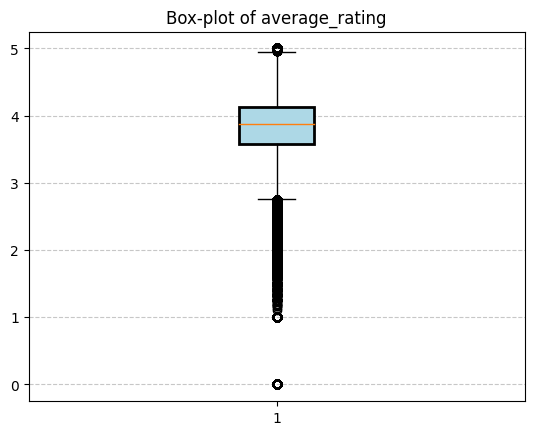

In [ ]:
media = books2['average_rating'].mean()
mediana = books2['average_rating'].median()
minimo = books2['average_rating'].min()
massimo = books2['average_rating'].max()

print("Base statistics on average_rating")
print("mean", round(media, 2))
print("median", round(mediana, 2))
print("min and max", minimo, massimo)

plt.boxplot(books2["average_rating"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of average_rating")
plt.show

Base statistics on ratings_count
mean 19652.52
median 117.0
min and max 0 7400639


<function matplotlib.pyplot.show(close=None, block=None)>

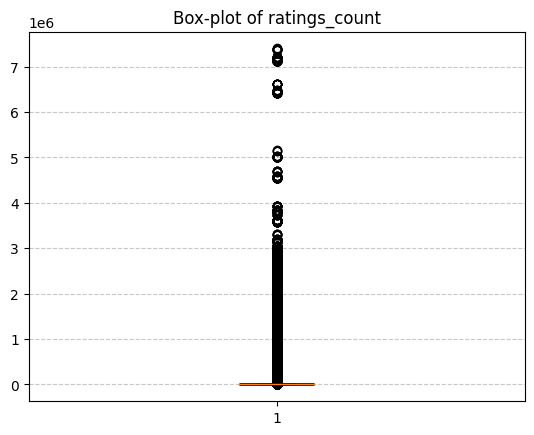

In [ ]:
media = books2['ratings_count'].mean()
mediana = books2['ratings_count'].median()
minimo = books2['ratings_count'].min()
massimo = books2['ratings_count'].max()

print("Base statistics on ratings_count")
print("mean", round(media, 2))
print("median", round(mediana, 2))
print("min and max", minimo, massimo)

plt.boxplot(books2["ratings_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of ratings_count")
plt.show

In [ ]:
books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"], errors='coerce')

books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"])

# Trova la data minima
data_minima = books2["original_publication_date"].min()

# Trova la data massima
data_massima = books2["original_publication_date"].max()

# Stampa i risultati
print("Minimum Date:", data_minima)
print("Maximum Date:", data_massima)

Minimum Date: 1678-01-01 00:00:00
Maximum Date: 2023-10-14 00:00:00


  language   count
0      eng  520345
1      spa   69574
2      ger   69184
3      ita   66776
4      fre   61948
5      por   49079
6    en-US   41403
7       nl   39031
8      ara   30207
9    en-GB   28752


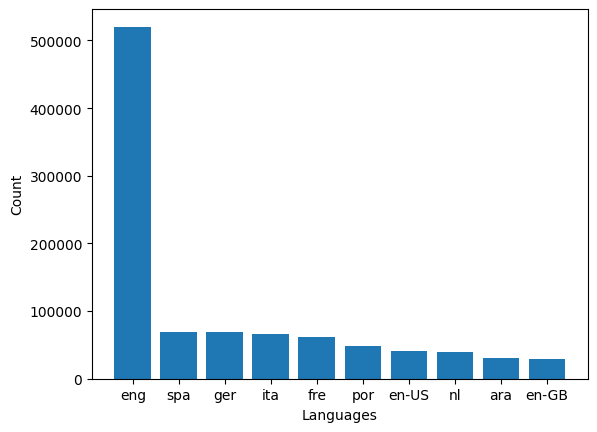

In [ ]:
conteggio_output = books2['language'].value_counts().reset_index()
conteggio_output.columns = ['language', 'count']
conteggio_output = conteggio_output.dropna()  # Rimuovo le righe con valori mancanti
conteggio_output_ordinato = conteggio_output.sort_values(by='count', ascending=False)
print(conteggio_output_ordinato.head(10))

primi10 = conteggio_output_ordinato.head(10)
plt.bar(primi10["language"], primi10['count'])
plt.xlabel('Languages')
plt.ylabel('Count')
plt.show()

In [ ]:
del authors
del books

## RQ 2: Retrieving some vital information:

### Plot the number of books for each author in descending order.

In [ ]:
author_book_counts = books2.groupby('author_name')['title'].count().reset_index()
author_book_counts = author_book_counts.sort_values(by='title', ascending=False)

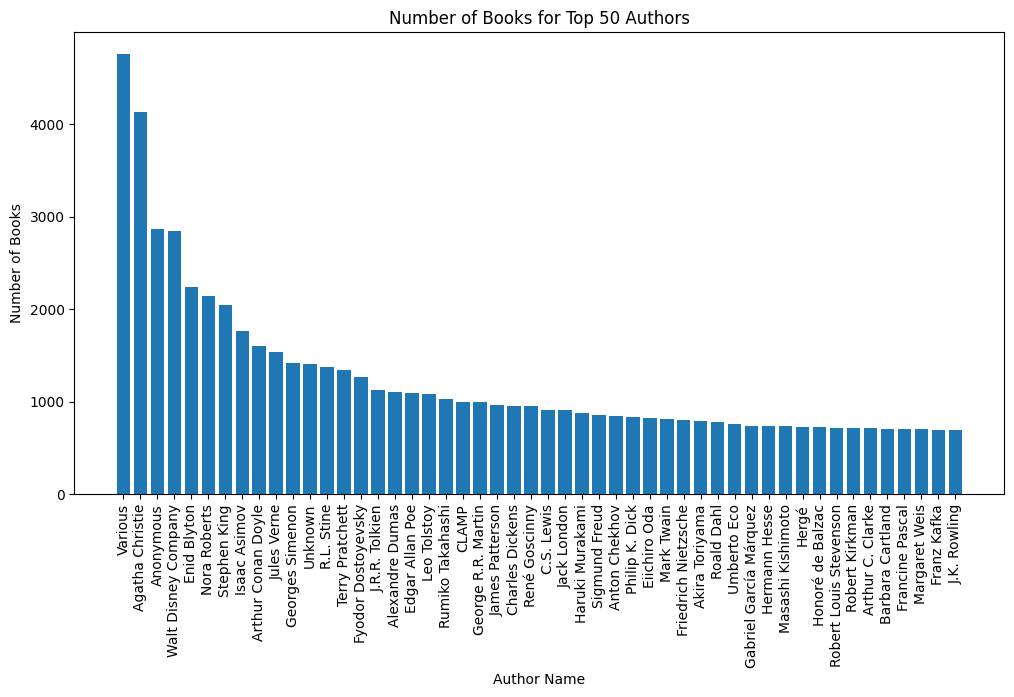

In [ ]:
# author names and book counts for top 50 authors
plt.figure(figsize=(12, 6))
plt.bar(author_book_counts[:50]['author_name'], author_book_counts[:50]['title'])
plt.xticks(rotation=90)
plt.xlabel('Author Name')
plt.ylabel('Number of Books')
plt.title('Number of Books for Top 50 Authors')
plt.show()

### Which book has the highest number of reviews?

In [ ]:
books2_sorted = books2.sort_values(by='text_reviews_count', ascending=False)
print(f"The book with the highest number of text reviews is '{books2_sorted['title'][1]}' with {books2_sorted['text_reviews_count'][1]} reviews.")


The book with the highest number of text reviews is 'Harry Potter and the Sorcerer's Stone (Harry Potter, #1)' with 116930 reviews.


### Which are the top ten and ten worst books concerning the average score?

In [ ]:
# Sort books by average rating in descending order for the top ten
best_books = books2.sort_values(by='average_rating', ascending=False)
ten_best_books= best_books.head(10)[['title','average_rating']]
# Sort books by average rating in ascending order for the ten worst
worst_books = books2.sort_values(by='average_rating', ascending=True)
ten_worst_books= worst_books.head(10)[['title','average_rating']]
# Print the top ten and ten worst books
print("Top Ten Books with Highest Average Rating:\n")
print(ten_best_books)
print("\nTen Worst Books with Lowest Average Rating:\n")
print(ten_worst_books)

Top Ten Books with Highest Average Rating:

                                                     title  average_rating
3355748  The Gospel of Matthew/The Death of Ivan Ilych/...             5.0
4684994                                Gigia ha il Diabete             5.0
6256490                   Now Is Not The Time For Trumpets             5.0
4685312  Whiz Tanner and the Vanishing Diamond (Tanner-...             5.0
4685142                      My Favourite Children's Songs             5.0
4685124                         The World Is a Scary Place             5.0
3472547                             Soulis Joe's Lost Mine             5.0
3472552                             Dissecting Sean Connor             5.0
3472556                                A Spoonful of Sugar             5.0
3472582                                      Бог в Ню Йорк             5.0

Ten Worst Books with Lowest Average Rating:

                                                     title  average_rating
4414879   

### Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

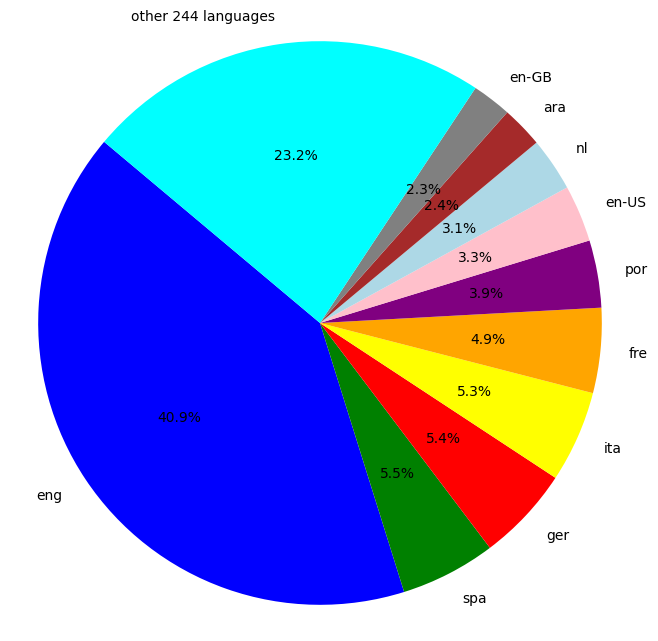

In [ ]:
lang_counts = books2['language'].value_counts().reset_index()
lang_counts.columns = ['language', 'count']  # Correggi l'assegnazione delle colonne
(lang_counts.shape[0])

top50lang = lang_counts.head(50)
(top50lang.head(2))

top10lang = lang_counts[lang_counts["language"].isin(["eng", "ger", "spa", "fre", "ita", "en-US", "por", "en-GB", "nl", "ara"])]
(top10lang.head(10))

riga_altro = pd.DataFrame({"language": ["other 244 languages"], "count": [lang_counts["count"].sum() - top10lang["count"].sum()]})
top10lang = pd.concat([top10lang, riga_altro], ignore_index=True)

plt.figure(figsize=(8, 8))  # Imposta le dimensioni del grafico
plt.pie(top10lang['count'], labels=top10lang['language'], autopct='%1.1f%%', colors=['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink', 'lightblue', 'brown', 'gray', 'cyan'], startangle=140)
plt.title('')
plt.axis('equal')
plt.show()


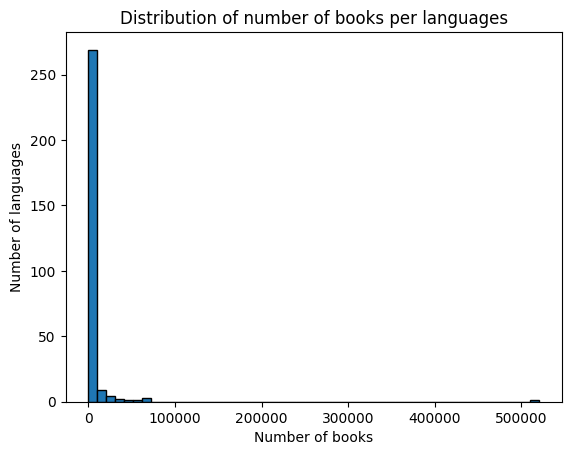

In [ ]:
plt.hist(lang_counts['count'], bins=50, edgecolor='k')
plt.xlabel('Number of books')
plt.ylabel('Number of languages')
plt.title('Distribution of number of books per languages')
plt.show()

### How many books have more than 250 pages?

In [ ]:
books250more = books2[(books2[["num_pages"]] > 250).all(axis=1)]

In [ ]:
print(f'Number of books with more than 250 pages is {books250more.shape[0]}')

Number of books with more than 250 pages is 597073


### Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

In [ ]:
top50author = author_book_counts.head(50)
top50author = top50author.rename(columns={"author_name": "name"})

In [ ]:
merged_df = pd.merge(top50author, authors3, on='name', how='left')

In [ ]:
merged_df[["name","fans_count"]].head(5)

,name,fans_count
0,Various,NaN
1,Agatha Christie,NaN
2,Anonymous,NaN
3,Walt Disney Company,NaN
4,Enid Blyton,NaN


Appearance of NaN values. So I will drop them.

In [ ]:
merged_df.dropna(subset=['fans_count'],inplace=True)

In [ ]:
merged_df[["name","fans_count"]].head(5)

,name,fans_count
5,Nora Roberts,41402.0
13,Terry Pratchett,35674.0
15,J.R.R. Tolkien,59406.0
19,Rumiko Takahashi,1395.0
20,CLAMP,2630.0


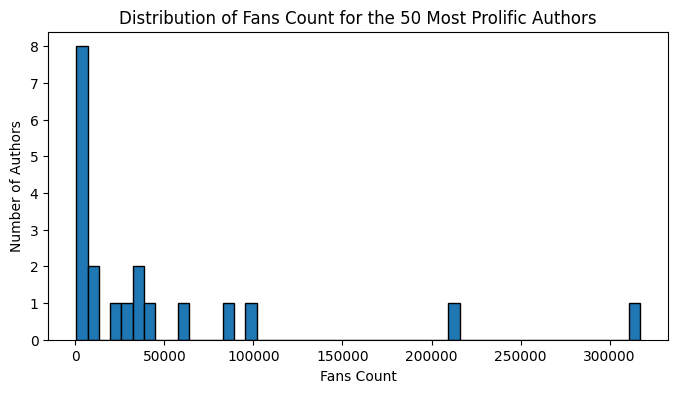

In [ ]:
# Plot the distribution of fans count
plt.figure(figsize=(8, 4))
plt.hist(merged_df['fans_count'], bins=50, edgecolor='k')
plt.xlabel('Fans Count')
plt.ylabel('Number of Authors')
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.show()

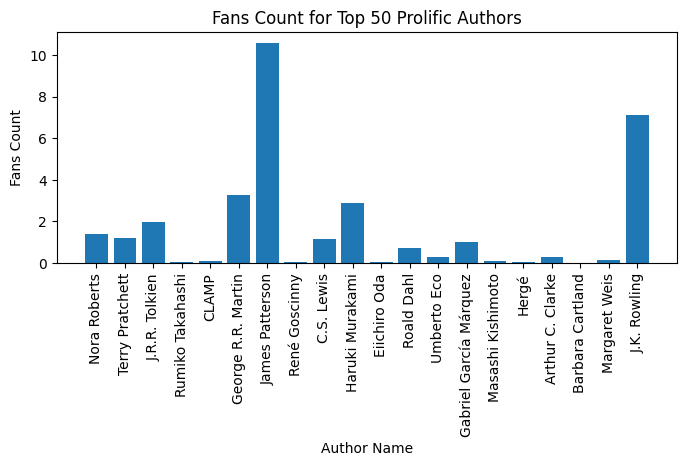

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(merged_df['name'], merged_df['fans_count']/30000) #i have normalized the count
plt.xticks(rotation=90)
plt.xlabel('Author Name')
plt.ylabel('Fans Count')
plt.title('Fans Count for Top 50 Prolific Authors')
plt.show()

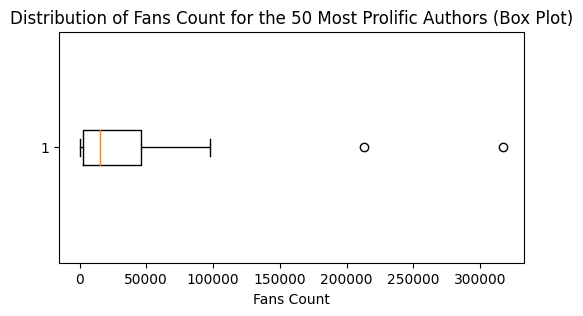

In [ ]:
plt.figure(figsize=(6, 3))
plt.boxplot(merged_df['fans_count'], vert=False)
plt.xlabel('Fans Count')
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors (Box Plot)')
plt.show()

## RQ 3: Historical look at the dataset!

data sets loaded and cleaned previously as: authors3, books2

In [ ]:
books2["original_publication_date"].min()

Timestamp('1678-01-01 00:00:00')

In [ ]:
books2["original_publication_date"].max()

Timestamp('2023-10-14 00:00:00')

### Write a function that takes as input a year and returns as output the following information:

The number of books published that year.

The total number of pages written that year.

The most prolific month of that year.

The longest book written that year.



In [ ]:
def books_info_for_year(year):

    books_in_year = books2[books2['original_publication_date'].dt.year == year]

    # total number of books published in the given year
    Num_Books = len(books_in_year)

    # total number of pages written in the given year
    Total_Pages = books_in_year.loc[:,'num_pages'].sum()

    # to count the most prolific month
    #books_in_year['publication_month'] = books_in_year['original_publication_date'].dt.month
    books_in_year['publication_month'] = books_in_year.loc[:,'original_publication_date'].dt.month

    Most_Prolific_Month = None
    longest_book = None

    if not books_in_year.empty:
        # to find the most prolific month
        #books_in_year['month'] = books_in_year['original_publication_date'].dt.month
        books_in_year['month'] = books_in_year.loc[:,'original_publication_date'].dt.month
        Most_Prolific_Month = books_in_year['month'].value_counts().idxmax()

        # the longest book written in that year
        longest_book = books_in_year[books_in_year['num_pages'] == books_in_year['num_pages'].max()]['title'].values[0]



    return Num_Books, Total_Pages, Most_Prolific_Month, longest_book


In [ ]:
import time
year = 2003
start_time=time.time()
result = books_info_for_year(year)
end_time=time.time()
print(result)
print(f"Time taken: {end_time - start_time:.2f} seconds")

(27855, 7902848.0, 1, 'Soldadura, Nivel Duo Guía del estudiante')
Time taken: 0.09 seconds


<ipython-input-187-9faa3a9fad87>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['publication_month'] = books_in_year.loc[:,'original_publication_date'].dt.month
<ipython-input-187-9faa3a9fad87>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['month'] = books_in_year.loc[:,'original_publication_date'].dt.month


### Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.



In [ ]:
years = books2['original_publication_date'].dt.year.unique()
yearly_info = pd.DataFrame(columns=['Year', 'Num_Books', 'Total_Pages', 'Most_Prolific_Month', 'Longest_Book'])
start_time=time.time()
for year in years:
  Num_Books, Total_Pages, Most_Prolific_Month, Longest_Book = books_info_for_year(year)
  yearly_info = yearly_info.append({'Year': year, 'Num_Books': Num_Books, 'Total_Pages': Total_Pages, 'Most_Prolific_Month': Most_Prolific_Month, 'Longest_Book': Longest_Book}, ignore_index=True)

end_time=time.time()

<ipython-input-187-9faa3a9fad87>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['publication_month'] = books_in_year.loc[:,'original_publication_date'].dt.month
<ipython-input-187-9faa3a9fad87>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['month'] = books_in_year.loc[:,'original_publication_date'].dt.month
<ipython-input-191-ed46fe91a165>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

Time taken to load DF: 22.99 seconds


<ipython-input-187-9faa3a9fad87>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['publication_month'] = books_in_year.loc[:,'original_publication_date'].dt.month
<ipython-input-187-9faa3a9fad87>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_in_year['month'] = books_in_year.loc[:,'original_publication_date'].dt.month
<ipython-input-191-ed46fe91a165>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [ ]:
print(f"Time taken to load DF: {end_time - start_time:.2f} seconds")

Time taken to load DF: 22.99 seconds


In [ ]:
print(yearly_info.head(10))

   Year Num_Books  Total_Pages Most_Prolific_Month  \
0  2003     27855    7902848.0                   1   
1  1997     19107    5390938.0                   1   
2  1998     20258    5701355.0                   1   
3  1999     21630    6094817.0                   1   
4  2000     24520    7166551.0                   1   
5  2005     33261    9590228.0                   1   
6  1979      7191    1944814.0                   1   
7  1996     18071    5091901.0                   1   
8  2002     25920    7381552.0                   1   
9  1984      9296    2552604.0                   1   

                                        Longest_Book  
0           Soldadura, Nivel Duo Guía del estudiante  
1                                     مجموعة الفتاوى  
2      Goethes Poetische Werke: Vollständige Ausgabe  
3                     ميخائيل نعيمه المجموعة الكاملة  
4                 Combo - As Crônicas de Gelo e Fogo  
5  幽・遊・白書 完全版 全15巻・全巻セット (幽・遊・白書 完全版 YuYu Hakusho...  
6                   

In [ ]:
print(yearly_info.tail(10))

     Year Num_Books  Total_Pages Most_Prolific_Month  \
336  1738         3        254.0                   1   
337  1705        10       7538.0                   1   
338  1694         6        571.0                   1   
339  1711        11       4129.0                   1   
340  2021        18       7544.0                   1   
341  1701         2         83.0                   1   
342  1700         4       1202.0                   1   
343  2022         7       1600.0                  12   
344  1679         3        990.0                   1   
345  2023         2        412.0                   5   

                                          Longest_Book  
336  De la conversation: Suivi d’un essai de Jonath...  
337                         روح البيان في تفسير القرآن  
338                                  Cuentos de antaño  
339  Voyages de Monsieur le chevalier Chardin en Pe...  
340  The Navigator's Children (The Last King of Ost...  
341                    Tabiat Işığı ile H

### Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.

In [ ]:
# Following implementation is done by Chat GPT 4.0:

def books_info(year):
    # filter the dataframe by the given year
    books_in_year = books2[books2['original_publication_date'].dt.year == year]

    # calculate the number of books published that year
    num_books = books_in_year.shape[0]

    # calculate the total number of pages written that year
    total_pages = books_in_year['num_pages'].sum()

    # calculate the most prolific month of that year
    most_prolific_month = books_in_year['original_publication_date'].dt.month.value_counts().idxmax()

    # find the longest book written that year
    longest_book = books_in_year.loc[books_in_year['num_pages'].idxmax()]['title']

    return {
        "Number of books published": num_books,
        "Total number of pages": total_pages,
        "Most prolific month": most_prolific_month,
        "Longest book": longest_book,
    }

print(books_info(2003))

{'Number of books published': 27855, 'Total number of pages': 7902848.0, 'Most prolific month': 1, 'Longest book': 'Soldadura, Nivel Duo Guía del estudiante'}


In [ ]:
# Following function is implemented by Bard LLM of Google:

import pandas as pd

def get_book_stats_by_year(books2, year):
  """Get book stats by year.

  Args:
    books2: A pandas DataFrame containing book data.
    year: The year to get book stats for.

  Returns:
    A dictionary containing the following information:
      * The number of books published that year.
      * The total number of pages written that year.
      * The most prolific month of that year.
      * The longest book written that year.
  """

  # Filter the books2 DataFrame to only include books published in the given year.
  books_by_year = books2[books2['original_publication_date'].dt.year == year]

  # Get the number of books published that year.
  num_books_published = len(books_by_year)

  # Get the total number of pages written that year.
  total_pages_written = books_by_year['num_pages'].sum()

  # Get the most prolific month of that year.
  most_prolific_month = books_by_year['original_publication_date'].dt.month.value_counts().nlargest(1).index[0]

  # Get the longest book written that year.
  longest_book = books_by_year[books_by_year['num_pages'] == books_by_year['num_pages'].max()]

  return {
    'num_books_published': num_books_published,
    'total_pages_written': total_pages_written,
    'most_prolific_month': most_prolific_month,
    'longest_book': longest_book
  }

In [ ]:
get_book_stats_by_year(books2, 2003)

{'num_books_published': 27855,
 'total_pages_written': 7902848.0,
 'most_prolific_month': 1,
 'longest_book':                                             title  num_pages language  \
 4026121  Soldadura, Nivel Duo Guía del estudiante     9998.0      spa   
 
          average_rating  ratings_count  text_reviews_count author_name  \
 4026121             4.5              2                   0       NCCER   
 
         original_publication_date publication_date  
 4026121                2003-08-08       2012-11-01  }

**Analyis and Remarks on the LLM Implementation:**

< write an essay here >

## RQ 4: Quirks questions about consistency.

### You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [ ]:
eponymous_authors = authors3[authors3.duplicated('name', keep=False)]
if not eponymous_authors.empty:
    print("Eponymous authors found: "+str(eponymous_authors.shape[0]))
    print(eponymous_authors['name'])


Eponymous authors found: 18
8639            Peter  Marshall
14943      Christopher Phillips
19037     William Messner-Loebs
74780           Peter  Marshall
99922             Yordan Yovkov
134763                محمد نجيب
165580      Jackson Butch Guice
171064                محمد نجيب
178267             Q. Hayashida
185467            Dimitar Dimov
193531      Jackson Butch Guice
194321             Q. Hayashida
200003     Christopher Phillips
228145            Yordan Yovkov
270233        James C.L. Carson
311093    William Messner-Loebs
314855            Dimitar Dimov
315853        James C.L. Carson
Name: name, dtype: object


### Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [ ]:
def get_author_books_v0(author_ids):
    author_books = {}
    for author_id in author_ids:
        matching_rows = authors3[authors3['id'] == author_id]
        if not matching_rows.empty:
            author_name = matching_rows.iloc[0]['name']
            # Check if 'author_name' is present in the 'books2' DataFrame
            if 'author_name' in books2.columns:
                books = books2[books2['author_name'] == author_name]['title'].tolist()
                author_books[author_name] = books
            else:
                # Handle the case where 'author_name' column is not found
                author_books[author_name] = ["Author's Books Not Found"]
        else:
            # Handle the case where no matching author is found
            author_books[author_name] = ["Author Not Found"]

    return author_books

### What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

**Top 20 authors by average rating**

In [ ]:
top_20_authors_v0 = authors3.nlargest(20, 'average_rating')
top_20_author_ids_v0 = top_20_authors_v0['id'].tolist()

*Get books of the top 20 authors*

In [ ]:
top_20_author_books_v0 = get_author_books_v0(top_20_author_ids_v0)

In [ ]:
longest_title_v0 = max(max(top_20_author_books_v0.values(), key=len), key=len)

In [ ]:
overall_longest_title_v0 = max(books2['title'], key=len)

In [ ]:
shortest_title_v0 = min(books2['title'], key=len)

In [ ]:
print("Top 20 authors' books:")
for author, books in top_20_author_books_v0.items():
    print(f"{author}: {books}")

Top 20 authors' books:
James T. Holmes: []
Jessie (Pierce) Trebesch: []
Staci Mauney: []
Robert Sidney: ['The Poems of Robert Sidney']
Christine K. Fields: []
Ondeane Lourens: []
Bonnie Kelso: []
Nikos Dimitriou: []
J.M. van Zuiden: []
Archimandrite Gabriel: []
Carlo de Incontrera: []
Lavelle Carlson: []
Tiffany Post: []
Robert     Reed: []
Catherine  Soto: []
Nancy Harding: []
Alex     Johnson: []
Xavier Seoane Rivas: ['A dama da noite']
Fran Moeller Gatins: []
Mark D. Swartz: []


In [ ]:
print(f"Longest book title among the top 20 authors: {longest_title_v0}")

Longest book title among the top 20 authors: The Poems of Robert Sidney


In [ ]:
if longest_title_v0 == overall_longest_title_v0:
    print("The longest book title among the top 20 authors is the same as the longest book title overall.")
else:
    print("The longest book title among the top 20 authors is not the same as the longest book title overall.")

The longest book title among the top 20 authors is not the same as the longest book title overall.


In [ ]:
print(f"Overall Longest book title is: {overall_longest_title_v0}")

Overall Longest book title is: Lecture on Human Happiness: Being the First of a Series of Lectures on That Subject in Which Will Be Comprehended a General Review of the Causes of the Existing Evils of Society [And a Development of Means by Which They May Be Permanently and Effectual...


In [ ]:
print(f"Shortest book title overall: {shortest_title_v0}")

Shortest book title overall: Q


###I can notice a lot of data of authors who have no books at all, this needs some further cleaning to do a proper analysis. Hence I will clean the authors dataset more according to the presence of author books in books dataset and redo the function implementations and answers to RQ 4.

In [ ]:
# Identify author IDs with no books in the books DataFrame
authors_with_books = books2['author_name'].unique()

In [ ]:
authors_with_books

array(['J.K. Rowling', 'Douglas Adams', 'Bill Bryson', ..., 'A.C. Spahn',
       'Alexis Koetting', 'Chad A. Clark'], dtype=object)

In [ ]:
authors_clean = authors3[authors3['name'].isin(authors_with_books)]

In [ ]:
authors_clean.shape[0]

138645

In [ ]:
def get_author_books(author_ids):
    author_books = {}
    for author_id in author_ids:
        matching_rows = authors_clean[authors_clean['id'] == author_id]
        if not matching_rows.empty:
            author_name = matching_rows.iloc[0]['name']
            # Check if 'author_id' is present in the 'books2' DataFrame
            if 'author_name' in books2.columns:
                books = books2[books2['author_name'] == author_name]['title'].tolist()
                author_books[author_name] = books
            else:
                # Handle the case where 'author_id' column is not found
                author_books[author_name] = ["Author's Books Not Found"]
        else:
            # Handle the case where no matching author is found
            author_books[author_name] = ["Author Not Found"]

    return author_books

In [ ]:
top_20_authors = authors_clean.nlargest(20, 'average_rating')
top_20_author_ids = top_20_authors['id'].tolist()

In [ ]:
top_20_author_books = get_author_books(top_20_author_ids)

In [ ]:
longest_title = max(max(top_20_author_books.values(), key=len), key=len)

In [ ]:
overall_longest_title = max(books2['title'], key=len)

In [ ]:
shortest_title = min(books2['title'], key=len)

In [ ]:
print("Top 20 authors' books:")
for author, books in top_20_author_books.items():
    print(f"{author}: {books}")

Top 20 authors' books:
Robert Sidney: ['The Poems of Robert Sidney']
Xavier Seoane Rivas: ['A dama da noite']
Lori Walters: ['The Day that Rocked the 4th Dimension']
Sean McSweeney: ['The On-And-On Tin']
Robert Jahn: ['Der salzige Fluss']
E.E.E.: ['A Warm Mirror Neuron On A Memory']
Darryl Scriven: ['The Love Commitment']
Julian Weiss: ['The Mester de Clerecía: Intellectuals and Ideologies in Thirteenth Century Castile', 'Locating the Middle Ages: The Spaces and Places of Medieval Culture']
John F. Wilson: ['Obra Morava en Nicaragua: trasfondo y breve historia']
Becky Long: ['Transition Nutrition: The Easy, Sustainable Way to Change Your Diet AND the Reasons Why You Should Change Now (Volume 1)']
Thaddeus Stevens: ['The Papers Of Thaddeus Stevens Volume 1: January 1814-March 1865']
Donald W. Bartow: ['The Gospel According to Mary, Mother of Jesus']
Peter W. Smorynski: ['A Shadow of Chaos (Universal War: ARM X, #2)']
Rodrigo Duarte Casar: ['Antónimos Anónimos: una Recopilación de Usos 

In [ ]:
print(f"Longest book title among the top 20 authors: {longest_title}")

Longest book title among the top 20 authors: The Mester de Clerecía: Intellectuals and Ideologies in Thirteenth Century Castile


In [ ]:
if longest_title == overall_longest_title:
    print("The longest book title among the top 20 authors is the same as the longest book title overall.")
else:
    print("The longest book title among the top 20 authors is not the same as the longest book title overall.")

The longest book title among the top 20 authors is not the same as the longest book title overall.


In [ ]:
print(f"Overall Longest book title is: {overall_longest_title}")

Overall Longest book title is: Lecture on Human Happiness: Being the First of a Series of Lectures on That Subject in Which Will Be Comprehended a General Review of the Causes of the Existing Evils of Society [And a Development of Means by Which They May Be Permanently and Effectual...


In [ ]:
print(f"Shortest book title overall: {shortest_title}")

Shortest book title overall: Q


##RQ 5: Authors with the most fans to be influential. Let’s have a deeper look.

###Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

In [ ]:
top10fansbasis= authors_clean.nlargest(10,'fans_count')

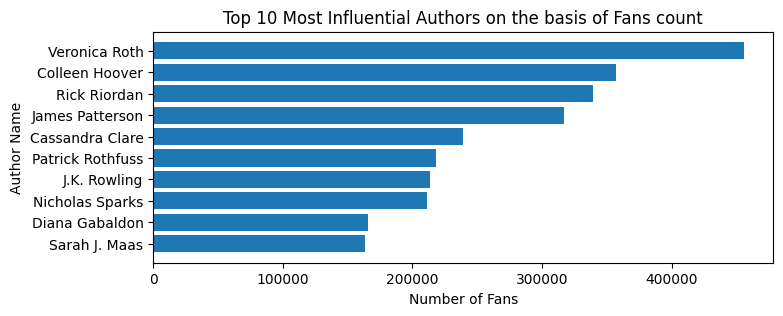

In [ ]:
plt.figure(figsize=(8, 3))
plt.barh(top10fansbasis['name'], top10fansbasis['fans_count'])
plt.xlabel('Number of Fans')
plt.ylabel('Author Name')
plt.title('Top 10 Most Influential Authors on the basis of Fans count')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the most influential at the top
plt.show()

In [ ]:
top10worksbasis=authors_clean.nlargest(10,'works_count')

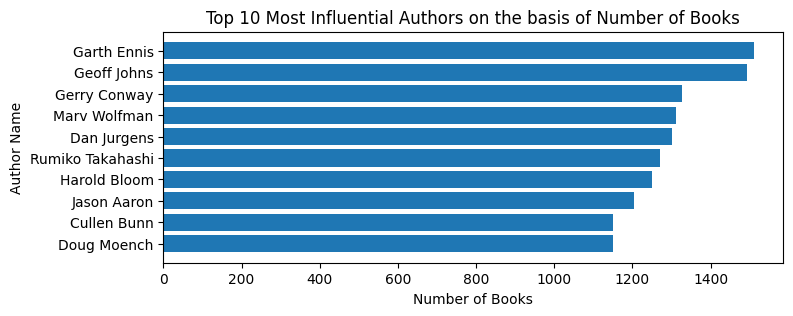

In [ ]:
plt.figure(figsize=(8, 3))
plt.barh(top10worksbasis['name'], top10worksbasis['works_count'])
plt.xlabel('Number of Books')
plt.ylabel('Author Name')
plt.title('Top 10 Most Influential Authors on the basis of Number of Books')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the most influential at the top
plt.show()

Now I will combine the two columns to find the overall influence based on the combined metrics.

In [ ]:
authors_clean['influence'] = authors_clean['fans_count'] * authors_clean['works_count']


<ipython-input-77-214fb8cd2b99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_clean['influence'] = authors_clean['fans_count'] * authors_clean['works_count']


In [ ]:
top10authors=authors_clean.nlargest(10,'influence')

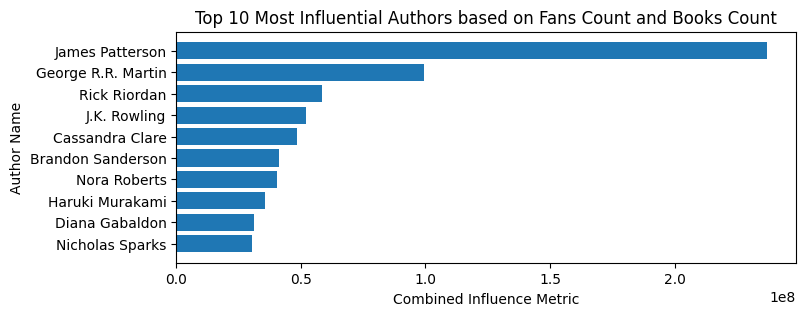

In [ ]:
plt.figure(figsize=(8, 3))
plt.barh(top10authors['name'], top10authors['influence'])
plt.xlabel('Combined Influence Metric')
plt.ylabel('Author Name')
plt.title('Top 10 Most Influential Authors based on Fans Count and Books Count')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the most influential at the top
plt.show()

Hence, the Most Influential Author is James Patterson.

In [ ]:
influential_author_names = top10authors['name'].tolist()

In [ ]:
print(influential_author_names)

['James Patterson', 'George R.R. Martin', 'Rick Riordan', 'J.K. Rowling', 'Cassandra Clare', 'Brandon Sanderson', 'Nora Roberts', 'Haruki Murakami', 'Diana Gabaldon', 'Nicholas Sparks']


### Have they published any series of books? If any, extract the longest series name among these authors.

I am filtering the dataset only on the basis of the top 10 influential author names:

In [ ]:
book_series_data = books2[books2['author_name'].isin(influential_author_names)]

In [ ]:
book_series_data.shape[0]

7469

In [ ]:
book_series_data.head(3)

,title,num_pages,language,average_rating,ratings_count,text_reviews_count,author_name,original_publication_date,publication_date,format,series_id,series_name,series_position
0,Harry Potter and the Order of the Phoenix (Har...,870.0,eng,4.50,2628006,44716,J.K. Rowling,2003-06-21,2004-09,Paperback,45175,Harry Potter,5
1,Harry Potter and the Sorcerer's Stone (Harry P...,309.0,eng,4.48,7377351,116930,J.K. Rowling,1997-06-26,2003-11-01,Hardcover,45175,Harry Potter,1
2,Harry Potter and the Chamber of Secrets (Harry...,352.0,eng,4.43,2855044,55286,J.K. Rowling,1998-07-02,2003-11-01,Hardcover,45175,Harry Potter,2


In [ ]:
series = book_series_data.groupby('author_name')['series_name'].unique()

In [ ]:
series

author_name
Brandon Sanderson     [Elantris, Mistborn, Alcatraz Versus The Evil ...
Cassandra Clare       [The Mortal Instruments, The Infernal Devices,...
Diana Gabaldon        [Outlander, The Outlandish Companions, Lord Jo...
George R.R. Martin    [A Song of Ice and Fire, , Wild Cards, The Art...
Haruki Murakami       [海辺のカフカ, , ノルウェイの森, ねじまき鳥クロニクル, The Rat, ねじまき鳥...
J.K. Rowling          [Harry Potter, , Hogwarts Library, Harry Potte...
James Patterson       [, Alex Cross, Women's Murder Club, Maximum Ri...
Nicholas Sparks          [, Jeremy Marsh & Lexie Darnell, The Notebook]
Nora Roberts          [, Gallaghers of Ardmore, Circle Trilogy, The ...
Rick Riordan          [Percy Jackson and the Olympians, Tres Navarre...
Name: series_name, dtype: object

In [ ]:
longest_name = series.apply(lambda x: max(x, key=len))

In [ ]:
longest_name

author_name
Brandon Sanderson                   Alcatraz Versus The Evil Librarians
Cassandra Clare                   The Mortal Instruments: Graphic Novel
Diana Gabaldon                           Outlander Split-Volume Edition
George R.R. Martin    Game of Thrones / Das Lied von Eis und Feuer (...
Haruki Murakami                                           ねじまき鳥クロニクル #3
J.K. Rowling            Harry Potter Persian/Farsi Split-Volume Edition
James Patterson                       The Best American Mystery Stories
Nicholas Sparks                            Jeremy Marsh & Lexie Darnell
Nora Roberts                           Time and Again: Hornblower-Stone
Rick Riordan          Percy Jackson and the Olympians: The Graphic N...
Name: series_name, dtype: object

In [ ]:
longest_series_name = longest_name[longest_name.str.len().idxmax()]

author_with_longest_series=", ".join(book_series_data[book_series_data['series_name']==longest_series_name]['author_name'].unique())


In [ ]:
print("Author with the Longest Series Name:", author_with_longest_series)
print("Longest Series Name:", longest_series_name)

Author with the Longest Series Name: George R.R. Martin
Longest Series Name: Game of Thrones / Das Lied von Eis und Feuer (Audible)


### How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.



In [ ]:
unique_formats = book_series_data.groupby('author_name')['format'].unique()

In [ ]:
unique_formats

author_name
Brandon Sanderson     [Mass Market Paperback, Hardcover, ebook, Pape...
Cassandra Clare       [Hardcover, Paperback, Broché, , Mass Market P...
Diana Gabaldon        [Paperback, Mass Market Paperback, Hardcover, ...
George R.R. Martin    [Paperback, Mass Market Paperback, Hardcover, ...
Haruki Murakami       [Paperback, Hardcover, , Taschenbuch, 単行本, Mas...
J.K. Rowling          [Paperback, Hardcover, Mass Market Paperback, ...
James Patterson       [Paperback, Mass Market Paperback, Hardcover, ...
Nicholas Sparks       [Paperback, Hardcover, Mass Market Paperback, ...
Nora Roberts          [Mass Market Paperback, Paperback, , Hardcover...
Rick Riordan          [Hardcover, Paperback, Audio CD, Board Book, ,...
Name: format, dtype: object

In [ ]:
formats_count = unique_formats.apply(lambda x: len(x))

In [ ]:
formats_count

author_name
Brandon Sanderson     12
Cassandra Clare       12
Diana Gabaldon        11
George R.R. Martin    21
Haruki Murakami       18
J.K. Rowling          15
James Patterson       14
Nicholas Sparks       10
Nora Roberts          27
Rick Riordan          10
Name: format, dtype: int64

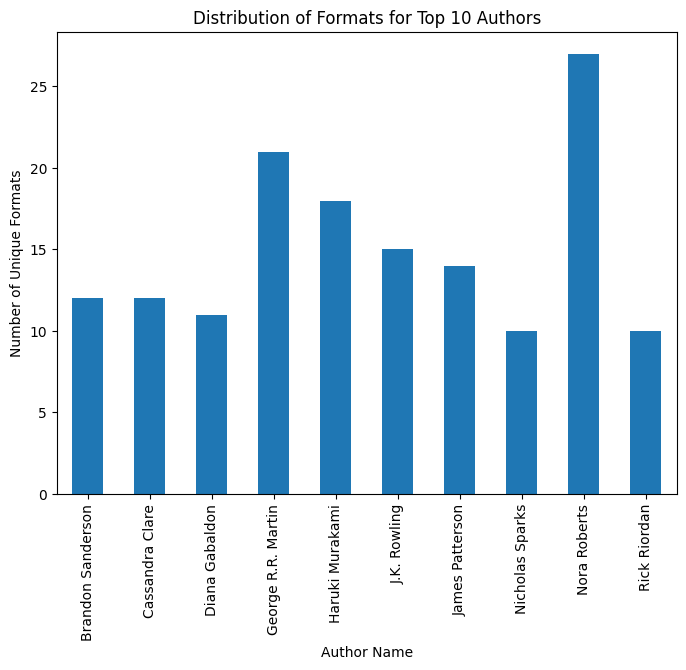

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
formats_count.plot(kind='bar')
plt.title('Distribution of Formats for Top 10 Authors')
plt.xlabel('Author Name')
plt.ylabel('Number of Unique Formats')
plt.show()

###Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:
You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.

In [ ]:
summary_by_gender = top10authors.groupby('gender')[['fans_count', 'average_rating', 'text_reviews_count']].agg(['mean', 'std', 'min', 'max'])

In [ ]:
summary_by_gender

fans_count                               average_rating            \
                 mean            std    min     max           mean       std   
gender                                                                         
female  164740.500000   87582.167841  41402  238560       4.265000  0.151987   
male    201767.333333  107979.658858  86123  339346       4.181667  0.197019   

                   text_reviews_count                                 
         min   max               mean            std     min     max  
gender                                                                
female  4.09  4.46      328483.750000  225395.936540  127360  606373  
male    3.96  4.38      249589.833333   78958.792016  167603  354145

**Summary:**

The table provides insights into the top 10 authors, specifically in terms of 'fans_count,' 'average_rating,' and 'text_reviews_count,' divided by gender (female and male). Here's a summary of the key statistics for each gender:

Female Authors:

The mean 'fans_count' for female authors is approximately 164,740.5, with a standard deviation of 87,582.17. The minimum 'fans_count' is 41,402, and the maximum is 238,560.
The mean 'average_rating' for female authors is around 4.265, with a standard deviation of 0.152. The lowest average rating is 4.09, and the highest is 4.46.
The mean 'text_reviews_count' for female authors is approximately 328,483.75, with a standard deviation of 225,395.94. The lowest text reviews count is 127,360, and the highest is 606,373.

Male Authors:

The mean 'fans_count' for male authors is about 201,767.33, with a standard deviation of 107,979.66. The minimum 'fans_count' is 86,123, and the maximum is 339,346.
The mean 'average_rating' for male authors is approximately 4.182, with a standard deviation of 0.197. The lowest average rating is 3.96, and the highest is 4.38.
The mean 'text_reviews_count' for male authors is around 249,589.83, with a standard deviation of 78,958.79. The lowest text reviews count is 167,603, and the highest is 354,145.






** I asked ChatGPT to implement a Visualisation for this summary statistics and here it goes:**

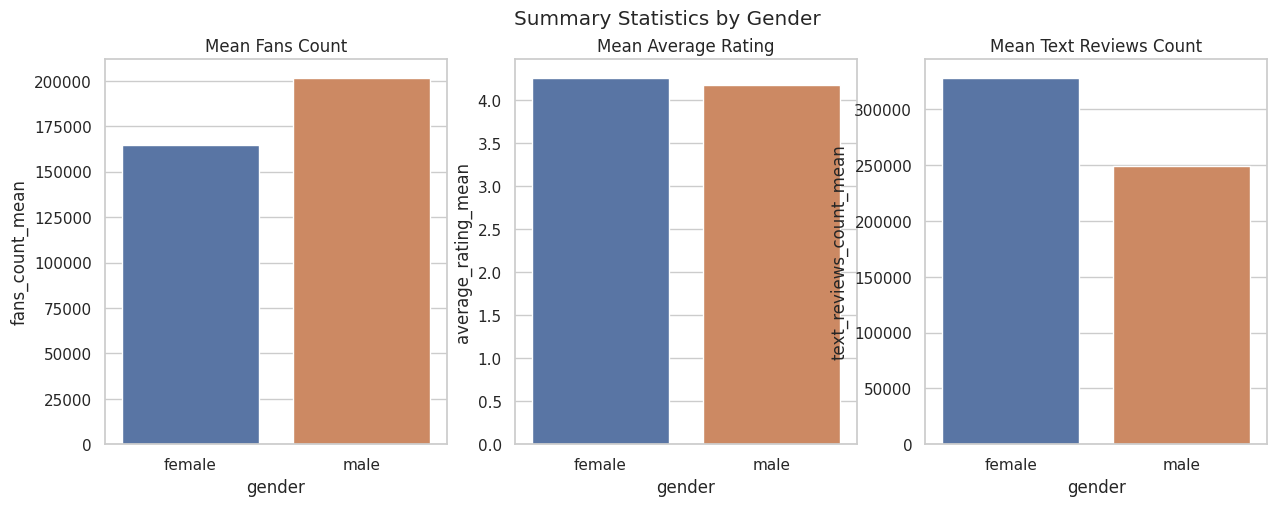

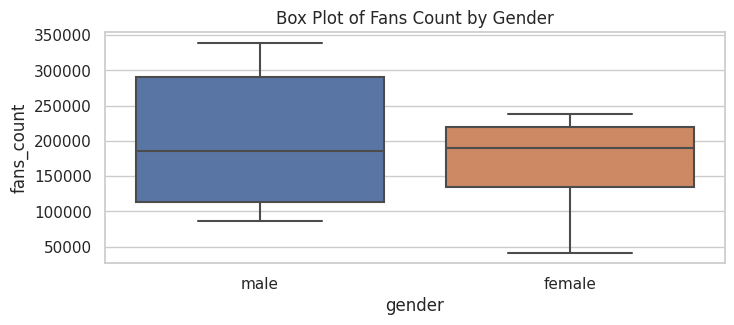

In [ ]:
import seaborn as sns

# Sample data (replace with your actual data)
mean_data = {
    'gender': ['female', 'male'],
    'fans_count_mean': [164740.5, 201767.33],
    'average_rating_mean': [4.265, 4.182],
    'text_reviews_count_mean': [328483.75, 249589.83]
}

# Create a DataFrame from the sample data
mean_df = pd.DataFrame(mean_data)

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bar chart for mean fans_count
sns.barplot(x="gender", y="fans_count_mean", data=mean_df, ax=axes[0])
axes[0].set(title="Mean Fans Count")

# Bar chart for mean average_rating
sns.barplot(x="gender", y="average_rating_mean", data=mean_df, ax=axes[1])
axes[1].set(title="Mean Average Rating")

# Bar chart for mean text_reviews_count
sns.barplot(x="gender", y="text_reviews_count_mean", data=mean_df, ax=axes[2])
axes[2].set(title="Mean Text Reviews Count")

# Add a common title for the subplots
plt.suptitle("Summary Statistics by Gender")

# Show the plots
plt.show()

# Create box plots to visualize data spread (you can adapt this)
# Example for 'fans_count'
plt.figure(figsize=(8, 3))
sns.boxplot(x='gender', y='fans_count', data=top10authors)
plt.title("Box Plot of Fans Count by Gender")
plt.show()


**Conclusions**

*Fans Count:*

Male authors, on average, have a slightly higher number of fans compared to female authors. However, there is significant variability within both groups, as indicated by the standard deviations.
The minimum and maximum fans count for both male and female authors is substantial, indicating a wide range of popularity among the top 10 authors.

*Average Rating:*

Female authors, on average, have a slightly higher average rating compared to male authors. Both groups have relatively high average ratings.
The standard deviations for average rating are relatively low, suggesting that most top 10 authors in both groups receive consistently high ratings.

*Text Reviews Count:*

Female authors have a notably higher mean text reviews count compared to male authors. This indicates that books by female authors in the top 10 receive more text reviews, on average.
The standard deviations for text reviews count are high, indicating variability in the number of reviews received by authors in both groups.
Overall, it's essential to note that these conclusions are based on the top 10 authors in the dataset and may not be representative of all authors.

Both male and female authors in the top 10 are popular, with a significant number of fans.
Female authors, on average, tend to have slightly higher average ratings and receive more text reviews.
There is variability in the popularity, average ratings, and reviews count within both groups.
However, it's important to consider that these insights are specific to the top 10 authors in the dataset and should not be generalized to all authors. Additional factors, such as the specific books or genres written by these authors, can influence these statistics.

##RQ 6: Consider the top 10 authors concerning the number of fans again.

###Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?


In [ ]:
top10onfansbasis= authors_clean.nlargest(10,'fans_count')

In [ ]:
popular_author_names = top10onfansbasis['name'].tolist()

In [ ]:
book_data_filtered = books2[books2['author_name'].isin(influential_author_names)]

In [ ]:
book_data_filtered.head(2)

,title,num_pages,language,average_rating,ratings_count,text_reviews_count,author_name,original_publication_date,publication_date,format,series_id,series_name,series_position,time_gap
179294,A Song for Lya,208.0,eng,3.94,1787,154,George R.R. Martin,1976-02-01,1976-02-01,Mass Market Paperback,,,,NaT
1183478,Het stervende licht,352.0,nl,3.57,5665,538,George R.R. Martin,1977-01-01,1977-01-01,Paperback,,,,335 days


here the Publication Date column has the value in wrong format, so we correct that area:

In [ ]:
book_data_filtered["publication_date"] = pd.to_datetime(book_data_filtered["publication_date"], errors='coerce')
book_data_filtered["publication_date"] = pd.to_datetime(book_data_filtered["publication_date"])
present_date = datetime.now()
book_data_filtered = book_data_filtered[book_data_filtered['publication_date'] <= present_date]
book_data_filtered["publication_date"].max()

<ipython-input-153-bc5a032a9d9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_data_filtered["publication_date"] = pd.to_datetime(book_data_filtered["publication_date"], errors='coerce')
<ipython-input-153-bc5a032a9d9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_data_filtered["publication_date"] = pd.to_datetime(book_data_filtered["publication_date"])


Timestamp('2021-03-02 00:00:00')

In [ ]:
# we are sorting the DataFrame by 'publication_date' within each series
book_data_filtered = book_data_filtered.sort_values(by=['series_name', 'publication_date'])

# and then calculating time gap between subsequent publications
book_data_filtered['time_gap'] = book_data_filtered.groupby('series_name')['publication_date'].diff()

# the average time gap for books belonging to a series
avg_time_gap_within_series = book_data_filtered[book_data_filtered['series_name']!='']['time_gap'].mean()

# Calculate the average time gap for books not belonging to a series
avg_time_gap_not_in_series = book_data_filtered[book_data_filtered['series_name']=='']['time_gap'].mean()

In [ ]:
print(f'Average time gap between two subsequent publications for a series of books is {avg_time_gap_within_series.days} days')
print(f'\nAverage time gap between two subsequent publications for books not belonging to a series is {avg_time_gap_not_in_series.days} days')

Average time gap between two subsequent publications for a series of books is 89 days

Average time gap between two subsequent publications for books not belonging to a series is 8 days


###For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?


In [ ]:
# we get the publication year
book_data_filtered['publication_year'] = book_data_filtered['publication_date'].dt.year

# to count the cumulative number of books published after group by author and year
book_data_filtered['cumulative_books'] = book_data_filtered.groupby(['author_name', 'publication_year']).cumcount() + 1

In [ ]:
book_data_filtered[['author_name','publication_year','cumulative_books']]

,author_name,publication_year,cumulative_books
179294,George R.R. Martin,1976,1
1183478,George R.R. Martin,1977,1
3942614,George R.R. Martin,1978,1
781039,George R.R. Martin,1978,2
486916,George R.R. Martin,1979,1
...,...,...,...
3422117,Haruki Murakami,2012,85
4710419,Haruki Murakami,2013,77
5498749,Haruki Murakami,2013,78
6101280,Haruki Murakami,2014,57


In [ ]:
# Extract the year from the 'publication_date' and create a new column 'publication_year'
book_data_filtered['publication_year'] = book_data_filtered['publication_date'].dt.year

book_counts = book_data_filtered.groupby(['author_name', 'publication_year']).size().unstack(level=0, fill_value=0)
#the above line of code groups the data by author_name and publication_year unique combinations and then unstacks the resultant
# into separate columns of author_names and rows of publication_year. The author who has a book published in a given year will have a cell value 1, 2, 3...etc
# based on the number of books published by that author in that given year. I am using this unstack function of the pandas dataframe to store a df into
# the book_counts.

In [ ]:
book_counts.head(5)

author_name,Brandon Sanderson,Cassandra Clare,Diana Gabaldon,George R.R. Martin,Haruki Murakami,J.K. Rowling,James Patterson,Nicholas Sparks,Nora Roberts,Rick Riordan
publication_year,,,,,,,,,,
1976,0,0,0,2,0,0,0,0,0,0
1977,0,0,0,1,0,0,0,0,0,0
1978,0,0,0,2,0,0,0,0,0,0
1979,0,0,0,4,2,0,0,0,0,0
1980,0,0,0,2,1,0,1,0,0,0


In [ ]:
cumulative_counts = book_counts.cumsum()

In [ ]:
cumulative_counts.head(5)

author_name,Brandon Sanderson,Cassandra Clare,Diana Gabaldon,George R.R. Martin,Haruki Murakami,J.K. Rowling,James Patterson,Nicholas Sparks,Nora Roberts,Rick Riordan
publication_year,,,,,,,,,,
1976,0,0,0,2,0,0,0,0,0,0
1977,0,0,0,3,0,0,0,0,0,0
1978,0,0,0,5,0,0,0,0,0,0
1979,0,0,0,9,2,0,0,0,0,0
1980,0,0,0,11,3,0,1,0,0,0


The cumsum() function helped in calculating the cumulative number of books published by the author upto a certain year. For example, George RR Martin has 2 books published till 1976, 2+1 till 1977, 2+1+2=5 till 1978 and so on...

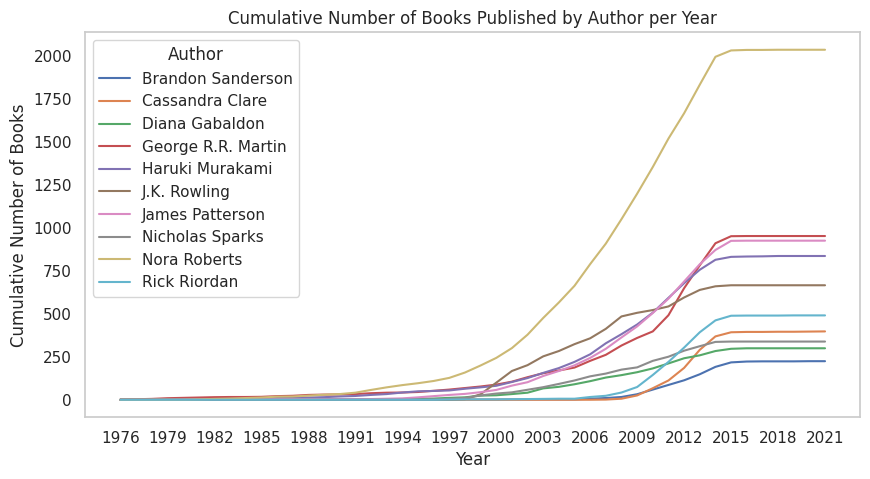

In [ ]:
# then we plot the cumulative counts for each author
cumulative_counts.plot(figsize=(10,5))
plt.title('Cumulative Number of Books Published by Author per Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Books')
plt.legend(title='Author')
plt.grid()
years = cumulative_counts.index
year_step = 3
years_to_display = years[::year_step]
plt.xticks(years_to_display)
plt.show()

**Looking at the graph, we can infer that, these top 10 popular authors are contemporary to each other. Their production curve has a sharp rise somewhere between 2009 and 2015 and after 2015, the production rate curve flattens. We can say, between approximately 2009 and 2015, their production rate was higher.**